# Исследование тарифных планов

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")

Описание таблицы с информацией о звонках
1. id — уникальный номер звонка
2. call_date — дата звонка
3. duration — длительность звонка в минутах
4. user_id — идентификатор пользователя, сделавшего звонок

In [2]:
#data_calls=pd.read_csv('calls.csv')
data_calls=pd.read_csv('/datasets/calls.csv')
data_calls.info() 
display(data_calls.head(10) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Описание таблицы с информацией об интернет-сессиях
1. id — уникальный номер сессии
2. mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
3. session_date — дата интернет-сессии
4. user_id — идентификатор пользователя

In [3]:
#data_internet=pd.read_csv('internet.csv')
data_internet=pd.read_csv('/datasets/internet.csv')
data_internet.info()     #получение информации
display(data_internet.head(10) )#просмотр данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Описание таблицы с информацией о сообщениях
1. id — уникальный номер сообщения
2. message_date — дата сообщения
3. user_id — идентификатор пользователя, отправившего сообщение

In [4]:
#data_messages=pd.read_csv('messages.csv')
data_messages=pd.read_csv('/datasets/messages.csv')
data_messages.info()     #получение информации
display(data_messages.head(10) )#просмотр данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Описание таблицы с информацией  о тарифах
1. tariff_name — название тарифа
2. rub_monthly_fee — ежемесячная абонентская плата в рублях
3. minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
4. messages_included — количество сообщений в месяц, включённых в абонентскую плату
5. mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
6. rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
7. rub_per_message — стоимость отправки сообщения сверх тарифного пакета
8. rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [5]:
#data_tariffs=pd.read_csv('tariffs.csv')
data_tariffs=pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()     #получение информации
display(data_tariffs.head(10) )#просмотр данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание таблицы с информацией о пользователях
1. user_id — уникальный идентификатор пользователя
2. first_name — имя пользователя
3. last_name — фамилия пользователя
4. age — возраст пользователя (годы)
5. reg_date — дата подключения тарифа (день, месяц, год)
6. churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
7. city — город проживания пользователя
8. tariff — название тарифного плана

In [6]:
#data_users=pd.read_csv('users.csv')
data_users=pd.read_csv('/datasets/users.csv')
data_users.info()     #получение информации
display(data_users.head(10) )#просмотр данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


### Предобработка данных

Количество звонков и продолжительность звонков по месяцам

In [7]:
data_calls['month']=pd.DatetimeIndex(data_calls['call_date']).month # добавление месяца для звонков
data_calls['duration'] = data_calls['duration'].apply(math.ceil)    #Округление до целых минут 
#сводная таблица по звонкам
user_calls=data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc= ['count','sum']).reset_index()  
user_calls.columns = ['user_id','month','count_call','sum_call']
display(user_calls.head(10))

,user_id,month,count_call,sum_call
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
5,1000,10,57,350.0
6,1000,11,43,338.0
7,1000,12,46,333.0
8,1001,11,59,430.0
9,1001,12,63,414.0


In [8]:
data_calls['test'] = data_calls['duration'].apply(math.ceil)

Количество сообщений по месяцам

In [9]:
data_messages['month']=pd.DatetimeIndex(data_messages['message_date']).month # добавление месяца для сообщений
#сводная таблица по сообщениям
user_messages=data_messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc= ['count']).reset_index()  
user_messages.columns = ['user_id','month','count_sms']
display(user_messages.head(10))

,user_id,month,count_sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [10]:
data_internet['month']=pd.DatetimeIndex(data_internet['session_date']).month # добавление месяца для сообщений
#сводная таблица использования интернета
user_internet=data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc= ['sum']).reset_index()  
user_internet.columns = ['user_id','month','trafik']
for i in range(len(user_internet)):
    user_internet['trafik'][i]=math.ceil(user_internet['trafik'][i]/1024)# перевод использованного трафика в Gb
display(user_internet.head(10))

,user_id,month,trafik
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


Построение сводной таблицы

In [11]:
Value_user=pd.merge(user_calls,user_messages,on=['user_id','month'],how='outer')
Value_user=pd.merge(Value_user,user_internet,on=['user_id','month'],how='outer')
Value_user=pd.merge(Value_user,data_users,on=['user_id'],how='outer')

display(Value_user.head(10))
Value_user.isna().sum() #количество пропусков

,user_id,month,count_call,sum_call,count_sms,trafik,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,57.0,350.0,73.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,43.0,338.0,58.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,46.0,333.0,70.0,10.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,59.0,430.0,NaN,18.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,63.0,414.0,NaN,14.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


user_id          0
month            2
count_call      42
sum_call        42
count_sms      499
trafik          13
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Все пропущенные значения можно заменить на 0, т.к. это значит что данной услугой не пользованлись, кроме churn_date

In [12]:
Value_user['count_call']=Value_user['count_call'].fillna(0)
Value_user['sum_call']=Value_user['sum_call'].fillna(0)
Value_user['count_sms']=Value_user['count_sms'].fillna(0)
Value_user['trafik']=Value_user['trafik'].fillna(0)

Value_user = Value_user.dropna(subset=['month'])

Value_user.isna().sum() #количество пропусков

user_id          0
month            0
count_call       0
sum_call         0
count_sms        0
trafik           0
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [13]:
Value_user.duplicated().sum()  #проверка на дубликаты

0

In [14]:
display(Value_user.head(10))

,user_id,month,count_call,sum_call,count_sms,trafik,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,57.0,350.0,73.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,43.0,338.0,58.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,46.0,333.0,70.0,10.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,59.0,430.0,0.0,18.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,63.0,414.0,0.0,14.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


Помесячная выручка

In [15]:
Value_user['pay']=0
for i in range(len(Value_user)): #цикл по всем пользователям с расчетом потраченных денег по месяцам
    summa=0
    if Value_user['tariff'][i]=='smart':
        sms_price=data_tariffs['rub_per_message'][0]
        min_price=data_tariffs['rub_per_minute'][0]
        Gb_price=data_tariffs['rub_per_gb'][0]
        total_min=data_tariffs['minutes_included'][0]
        total_sms=data_tariffs['messages_included'][0]
        total_Gb=data_tariffs['mb_per_month_included'][0]/1024
        summa=data_tariffs['rub_monthly_fee'][0]
        
        if  Value_user['sum_call'][i]-total_min>0:
            summa=summa+(Value_user['sum_call'][i]-total_min)*min_price
        if  Value_user['count_sms'][i]-total_sms>0:
            summa=summa+(Value_user['count_sms'][i]-total_sms)*sms_price
        if  Value_user['trafik'][i]-total_Gb>0:
            summa=summa+(Value_user['trafik'][i]-total_Gb)*Gb_price
        
    else:
        sms_price=data_tariffs['rub_per_message'][1]
        min_price=data_tariffs['rub_per_minute'][1]
        Gb_price=data_tariffs['rub_per_gb'][1]
        total_min=data_tariffs['minutes_included'][1]
        total_sms=data_tariffs['messages_included'][1]
        total_Gb=data_tariffs['mb_per_month_included'][1]/1024
        summa=data_tariffs['rub_monthly_fee'][1]
        
        if  Value_user['sum_call'][i]-total_min>0:
            summa=summa+(Value_user['sum_call'][i]-total_min)*min_price
        if  Value_user['count_sms'][i]-total_sms>0:
            summa=summa+(Value_user['count_sms'][i]-total_sms)*sms_price
        if  Value_user['trafik'][i]-total_Gb>0:
            summa=summa+(Value_user['trafik'][i]-total_Gb)*Gb_price
        
    Value_user['pay'][i]=summa
display(Value_user.head(10)) # просмотр результата

,user_id,month,count_call,sum_call,count_sms,trafik,age,churn_date,city,first_name,last_name,reg_date,tariff,pay
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
5,1000,10.0,57.0,350.0,73.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
6,1000,11.0,43.0,338.0,58.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
7,1000,12.0,46.0,333.0,70.0,10.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
8,1001,11.0,59.0,430.0,0.0,18.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,1150
9,1001,12.0,63.0,414.0,0.0,14.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,550


In [16]:
avr_call=Value_user.groupby(['month','tariff'])['sum_call'].mean().reset_index()# среднее по неделям для всех тарифов
avr_call_smart=avr_call.query('tariff =="smart"')  # среднее по неделям для тарифа "smart"
avr_call_ultra=avr_call.query('tariff =="ultra"') # среднее по неделям для тарифа "ultra"

print('среднее количество потраценых минут в месяц для тарифа смарт =',avr_call_smart['sum_call'].mean())
print('среднее количество потраценых минут в месяц для тарифа ультра =',avr_call_ultra['sum_call'].mean())


avr_call=Value_user.groupby('tariff')['sum_call'].mean().reset_index() # среднее  по тарифам
display(avr_call)


среднее количество потраценых минут в месяц для тарифа смарт = 386.76049870568664
среднее количество потраценых минут в месяц для тарифа ультра = 495.9343101624627


,tariff,sum_call
0,smart,417.934948
1,ultra,526.623350


**Вывод**

Клиенты тарифа ультра в среднем больше тратят времени на звонки, чем клиенты тарифа смарт. В среднем клиентам тарифа сматр нужно 387 минут, а клиентам тарифа ультра 496 минут.

#### Дисперсия, стандартное отклонение и графики по тарифу смарт

                 var        std        mean
            sum_call   sum_call    sum_call
tariff                                     
smart   36219.315784  190.31373  417.934948


<AxesSubplot:ylabel='Frequency'>

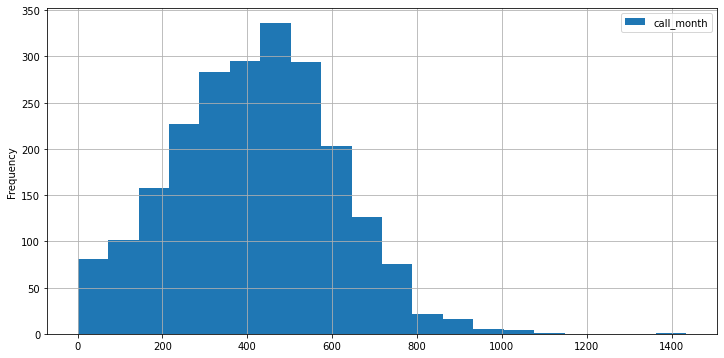

In [17]:
smart_div=Value_user.query('tariff =="smart"') 

avr_call_smart=smart_div.pivot_table(index = 'tariff', values = ['sum_call'],aggfunc = ['var', 'std', 'mean'])
print(avr_call_smart)

smart_div.plot( y='sum_call',kind='hist',bins=20 ,grid=True, label='call_month',figsize=(12, 6))

**Вывод**

Среднее количество использованных минут в месяц составляет 417 для пользователей тарифа смарт. 99%  пользователей хватает 987 минут на разговор в месяц, что значительно больше стандартного пакета 

               var        std       mean
         count_sms  count_sms  count_sms
tariff                                  
smart   796.812958  28.227876  33.384029


<AxesSubplot:ylabel='Frequency'>

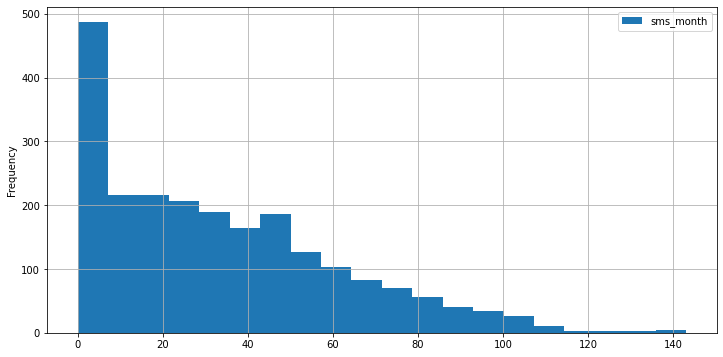

In [18]:
avr_sms=smart_div.pivot_table(index = 'tariff', values = ['count_sms'],aggfunc = ['var', 'std', 'mean'])
print(avr_sms)

smart_div.plot(y='count_sms',kind='hist',bins=20 ,grid=True, label='sms_month',figsize=(12, 6))

**Вывод**

Среднее количество использованных смс в месяц составляет 31 для пользователей тарифа смарт. 99%  пользователей хватает 117 смс в месяц. 

              var       std       mean
           trafik    trafik     trafik
tariff                                
smart   33.028705  5.747061  16.328847


<AxesSubplot:ylabel='Frequency'>

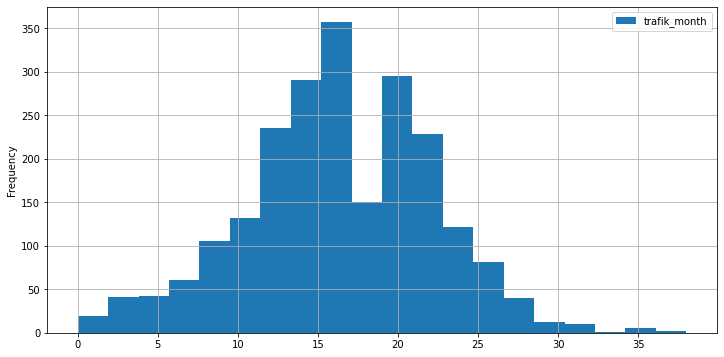

In [19]:
avr_Gb=smart_div.pivot_table(index = 'tariff', values = ['trafik'],aggfunc = ['var', 'std', 'mean'])
print(avr_Gb)

smart_div.plot( y='trafik',kind='hist',bins=20 ,grid=True, label='trafik_month',figsize=(12, 6))

**Вывод**

Среднее количество использованного трафика Gb в месяц составляет 16 для пользователей тарифа смарт, что больше чем предлагает стандартный пакет. 99%  пользователей хватает 34 Gb трафика в месяц. Таким образом больше половины пользователей тарифа смарт доплафивает за интернет.

  tariff        var_pay     std_pay     mean_pay
0  smart  669785.708006  818.404367  1289.973531
Доля стандартных платежей= 25.44%


<AxesSubplot:ylabel='Frequency'>

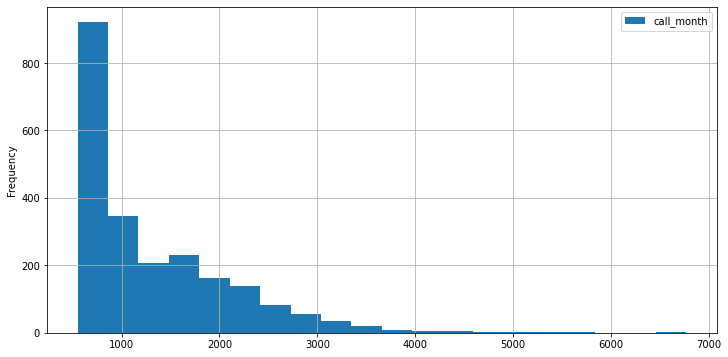

In [20]:
delta_pay_s=smart_div.pivot_table(index = 'tariff', values = ['pay'],aggfunc = ['var', 'std', 'mean']).reset_index() 
delta_pay_s.columns = ['tariff','var_pay','std_pay','mean_pay']
print(delta_pay_s)

smart_pay=smart_div.query('pay == 550').count()
rezul=smart_pay['pay']/len(smart_div)
print('Доля стандартных платежей=', f'{rezul:.2%}' )

smart_div.plot( y='pay',kind='hist',bins=20 ,grid=True, label='call_month',figsize=(12, 6))

**Вывод**
Около 75% пользователей тарифа смарт платят больше, чем стандартная абонентская плата.

#### Дисперсия, стандартное отклонение и графики по тарифу ультра

                  var         std       mean
             sum_call    sum_call   sum_call
tariff                                      
ultra   100873.633397  317.606098  526.62335


<AxesSubplot:ylabel='Frequency'>

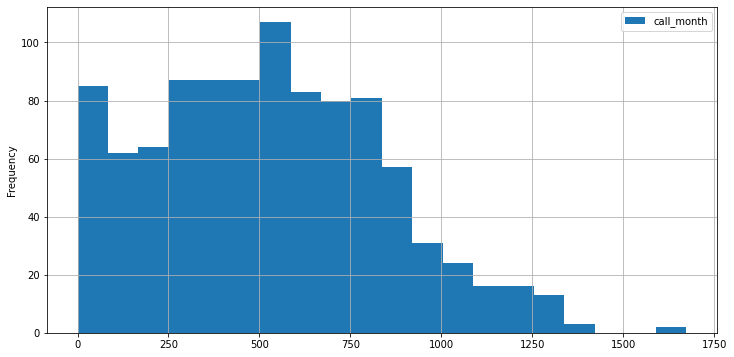

In [21]:
ultra_div=Value_user.query('tariff =="ultra"') # данные тарифа  ультра
avr_call=ultra_div.pivot_table(index = 'tariff', values = ['sum_call'],aggfunc = ['var', 'std', 'mean'])
print(avr_call)

ultra_div.plot(y='sum_call',kind='hist' ,bins=20,grid=True, label='call_month',figsize=(12, 6))

**Вывод**

Среднее количество использованных минут в месяц составляет 526 для пользователей тарифа ультра. 99%  пользователей хватает 1477 минуты на разговор в месяц, что полностью вписывается в тарифный план.

                var        std       mean
          count_sms  count_sms  count_sms
tariff                                   
ultra   2285.266143  47.804457  49.363452


<AxesSubplot:ylabel='Frequency'>

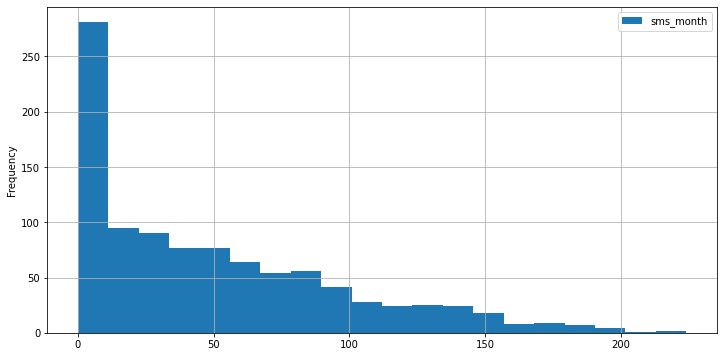

In [22]:
delta_sms=ultra_div.pivot_table(index = 'tariff', values = ['count_sms'],aggfunc = ['var', 'std', 'mean'])
print(delta_sms)

ultra_div.plot(y='count_sms',kind='hist',bins=20 ,grid=True, label='sms_month',figsize=(12, 6))

**Вывод**

Среднее количество использованных смс в месяц составляет 49 для пользователей тарифа ультра. 99%  пользователей хватает 196 смс в месяц, что полностью вписывается в тарифный план ультра. 

              var       std       mean
           trafik    trafik     trafik
tariff                                
ultra   97.091686  9.853511  19.494416


<AxesSubplot:ylabel='Frequency'>

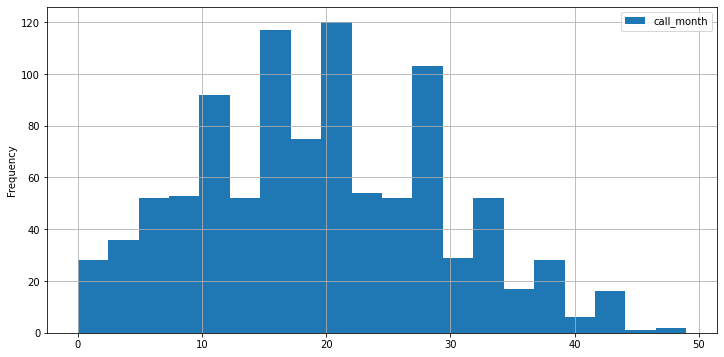

In [23]:
delta_Gb=ultra_div.pivot_table(index = 'tariff', values = ['trafik'],aggfunc = ['var', 'std', 'mean'])
print(delta_Gb)

ultra_div.plot(y='trafik',kind='hist',bins=20 ,grid=True, label='call_month',figsize=(12, 6))

**Вывод**

Среднее количество использованного трафика Gb в месяц составляет 20 для пользователей тарифа ультра, что несколько меньше чем предлагает тарифный план. 99%  пользователей хватает 50 Gb трафика в месяц. Таким образом меньше половины пользователей тарифа ультра доплафивает за интернет.

  tariff        var_pay     std_pay     mean_pay
0  ultra  141516.745079  376.187114  2070.152284
Доля стандартных платежей= 86.40%


<AxesSubplot:ylabel='Frequency'>

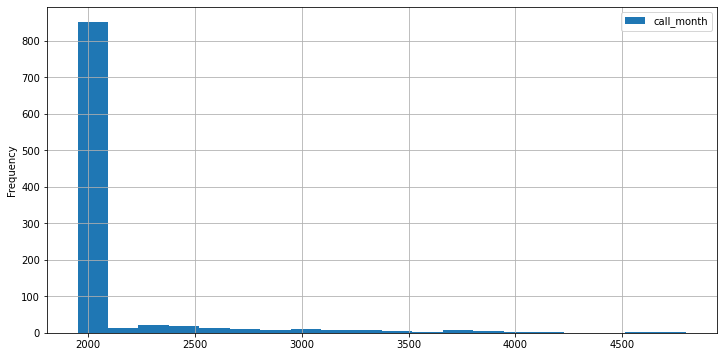

In [24]:
delta_pay_u=ultra_div.pivot_table(index = 'tariff', values = ['pay'],aggfunc = ['var', 'std', 'mean']).reset_index() 
delta_pay_u.columns = ['tariff','var_pay','std_pay','mean_pay']
print(delta_pay_u)

ultra_pay=ultra_div.query('pay == 1950').count()
rezul=ultra_pay['pay']/len(ultra_div)
print('Доля стандартных платежей=', f'{rezul:.2%}' )

ultra_div.plot(y='pay',kind='hist',bins=20 ,grid=True, label='call_month',figsize=(12, 6))

**Вывод**
Около 13,5% пользователей тарифа  ультра платят больше, чем стандартная абонентская плата.

In [25]:

Value_user.pivot_table(index = 'tariff', values = ['sum_call', 'trafik', 'count_sms'],
                            aggfunc = ['var', 'std', 'mean'])

var                                  std              \
          count_sms       sum_call     trafik  count_sms    sum_call   
tariff                                                                 
smart    796.812958   36219.315784  33.028705  28.227876  190.313730   
ultra   2285.266143  100873.633397  97.091686  47.804457  317.606098   

                       mean                         
          trafik  count_sms    sum_call     trafik  
tariff                                              
smart   5.747061  33.384029  417.934948  16.328847  
ultra   9.853511  49.363452  526.623350  19.494416

### Проверка гипотез

#### Гипотеза Н0. Средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадают.
Гипотеза Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [32]:
print('Средняя выручка с тарифа смарт = ',delta_pay_s['mean_pay'][0]) 
print('Средняя выручка с тарифа ультра = ',delta_pay_u['mean_pay'][0])

alpha = .05

results=scipy.stats.ttest_ind(ultra_div['pay'],smart_div['pay'])
print('p-значение:', results.pvalue)
print('статистика:', results.statistic)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу Н0")
else:
    print("Не отвергаем нулевую гипотезу Н0") 

Средняя выручка с тарифа смарт =  1289.9735307312696
Средняя выручка с тарифа ультра =  2070.1522842639592
p-значение: 1.4229814360764067e-160
статистика: 28.611056741704818
Отвергаем нулевую гипотезу Н0


**Вывод**
Гипотеза не подтвердилась. Гипотеза Н1 - Средняя выручка пользователей тарифов «Ультра»  и «Смарт» различаются. Средняя выручка с тарифа ультра значительно больше по сравнению с тарифом смарт. 

#### Гипотеза Н0. Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов?

Гипотеза Н1.   Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?

In [37]:
Moscow_city=Value_user.query('city == "Москва"')
other_city=Value_user.query('city != "Москва"')

alpha = .05

results=scipy.stats.ttest_ind(Moscow_city['pay'],other_city['pay'])
print('p-значение:', results.pvalue)
print('статистика:', results.statistic)

if results.pvalue < alpha:
    
   
    print("Отвергаем нулевую гипотезу Н0")
else:
    print("Не отвергаем нулевую гипотезу Н0") 

p-значение: 0.5440152911670224
статистика: 0.606816942705698
Не отвергаем нулевую гипотезу Н0


**Вывод**
Средняя выручка пользователей из Москвы не отличается от средней выручки из других городов. Гипотеза Н0 подтвердилась.